In [69]:
import pandas as pd
import  numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [75]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
#to display no. of samples on each  class
df['species'].value_counts() 

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [81]:
#preprocessing the dataset
#checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

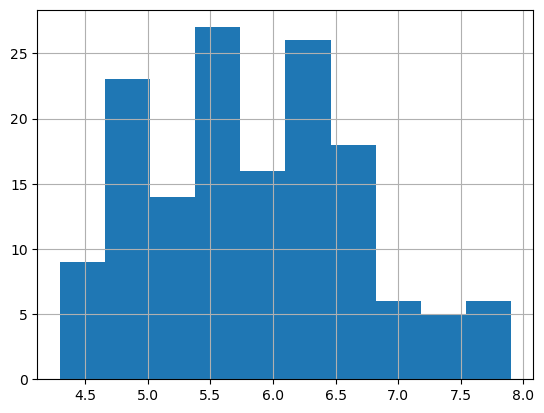

In [19]:
#all histograms
df['sepal_length'].hist()

<Axes: >

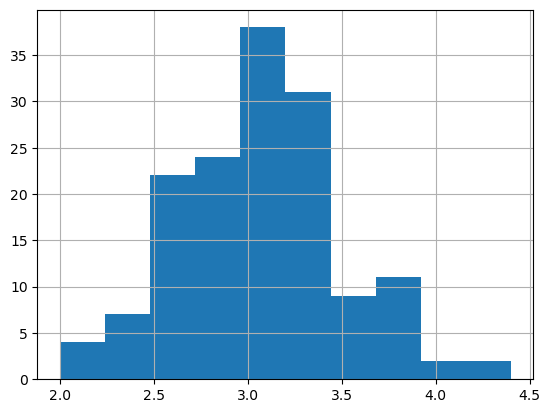

In [21]:
df['sepal_width'].hist()

<Axes: >

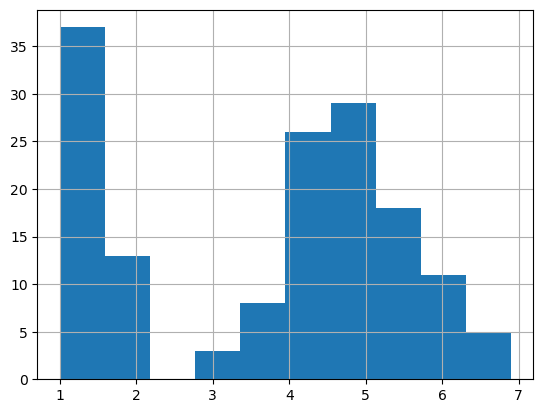

In [23]:
df['petal_length'].hist()

<Axes: >

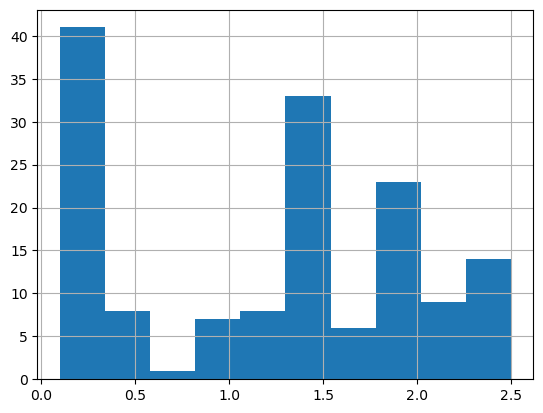

In [25]:
df['petal_width'].hist()

In [27]:
#scatterplot
colors=['yellow','green','brown']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

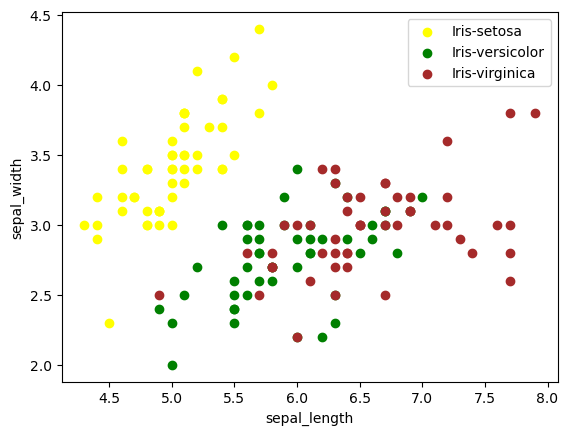

In [29]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

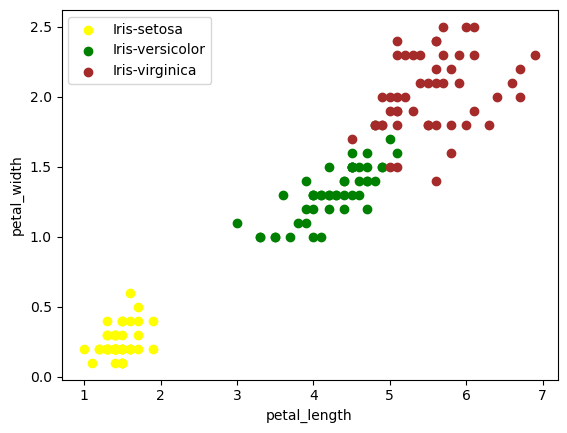

In [31]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

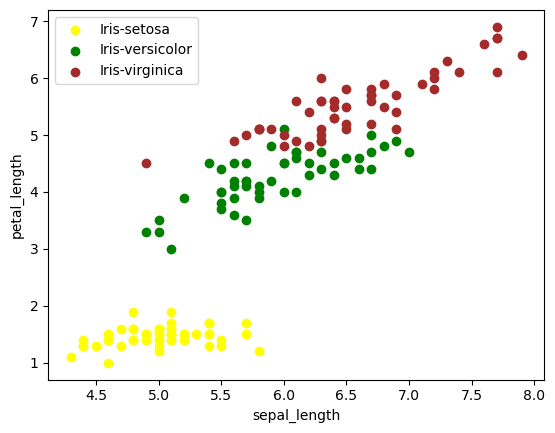

In [33]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

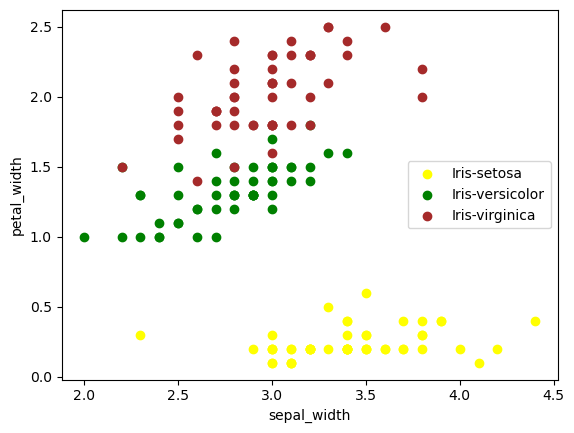

In [43]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

In [93]:
#coorelation matrix
df.corr(numeric_only = True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

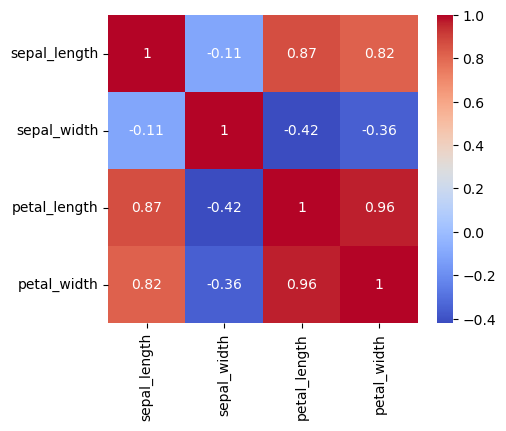

In [97]:
corr=df.corr(numeric_only = True)
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [99]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [101]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [103]:
#model training
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X=df.drop(columns=['species'])
Y=df['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [105]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [107]:
model.fit(X_train,Y_train)

LogisticRegression()

In [109]:
#metrics to get performance
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 93.33333333333333


In [111]:
#using K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [113]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [115]:
#metrics to get performance 
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 91.11111111111111


In [117]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [119]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [121]:
#to check accuracy
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 93.33333333333333
